### Read Dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df_fruit=pd.read_excel('fruit.xlsx')

In [30]:
df_fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [31]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [32]:
df_fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [33]:
#membaca object apa saja yang ada pada kolom species(dependen)
pd.unique(df_fruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [34]:
#menghitung jumlah object yang ada pada kolom species
df_fruit['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

### Split dependen (Target/label) independen(atribut) variabel

In [35]:
# x = df_fruit.iloc[:,1:].values
# y = df_fruit.iloc[:,[0]].values

x = df_fruit.drop(columns=['name']).values
y = df_fruit['name'].values

### Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Split Train Test

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Klasifikasi knn

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
model = RandomForestClassifier(n_estimators=132).fit(x_train,y_train)
model

RandomForestClassifier(n_estimators=132)

### Prediksi/test

In [106]:
y_prediksi = model.predict(x_test)

### Cek akurasi

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb


In [108]:
print("Nilai AKurasi : ",accuracy_score(y_test,y_prediksi))

Nilai AKurasi :  0.943


              precision    recall  f1-score   support

  grapefruit       0.94      0.95      0.95      1012
      orange       0.95      0.93      0.94       988

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



<Axes: >

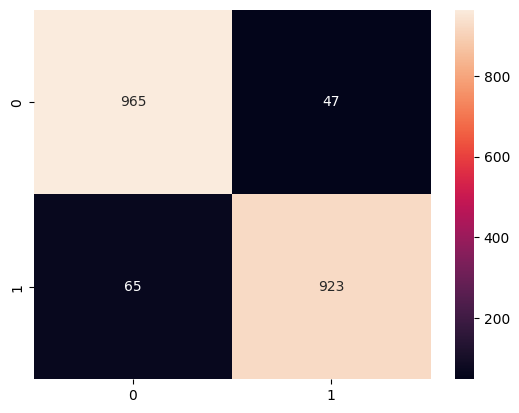

In [67]:
print(classification_report(y_test,y_prediksi))
sb.heatmap(confusion_matrix(y_test,y_prediksi),annot=True,fmt='g')

### Mencari Parameter Terbaik

In [54]:
n_akurasi = []
for k in range (100,150):
    rf = RandomForestClassifier(n_estimators=k).fit(x_train,y_train)
    y_prediksi = rf.predict(x_test)
    akurasi = accuracy_score(y_test,y_prediksi)
    n_akurasi.append(akurasi)
print(n_akurasi)

[0.943, 0.939, 0.943, 0.944, 0.946, 0.943, 0.946, 0.9455, 0.945, 0.941, 0.946, 0.9425, 0.942, 0.9445, 0.9435, 0.943, 0.9435, 0.944, 0.9445, 0.9435, 0.94, 0.9435, 0.942, 0.942, 0.944, 0.943, 0.9435, 0.9445, 0.9435, 0.9405, 0.943, 0.9495, 0.9425, 0.9425, 0.943, 0.9445, 0.944, 0.9465, 0.9435, 0.943, 0.942, 0.943, 0.946, 0.9405, 0.9445, 0.944, 0.946, 0.948, 0.9435, 0.9465, 0.946, 0.9465, 0.943, 0.945, 0.9415, 0.945, 0.944, 0.9445, 0.9465, 0.9435, 0.944, 0.9435, 0.9465, 0.9455, 0.9455, 0.9465, 0.9455, 0.9455, 0.9415, 0.9435, 0.944, 0.942, 0.9445, 0.9465, 0.9405, 0.939, 0.941, 0.946, 0.944, 0.9465, 0.9435, 0.944, 0.9425, 0.943, 0.9425, 0.947, 0.9425, 0.944, 0.944, 0.942, 0.9425, 0.947, 0.946, 0.9455, 0.9435, 0.9445, 0.9455, 0.945, 0.944, 0.944, 0.9435, 0.944, 0.9435, 0.9435, 0.9455, 0.945, 0.943, 0.9425, 0.945, 0.9435, 0.942, 0.9445, 0.944, 0.944, 0.944, 0.9445, 0.945, 0.943, 0.9415, 0.9465, 0.9435, 0.945, 0.941, 0.948, 0.9445, 0.9445, 0.9455, 0.9425, 0.943, 0.943, 0.944, 0.9435, 0.9445, 0.9

In [109]:
max(n_akurasi)


0.9495

In [111]:
n_akurasi.index(max(n_akurasi))

31

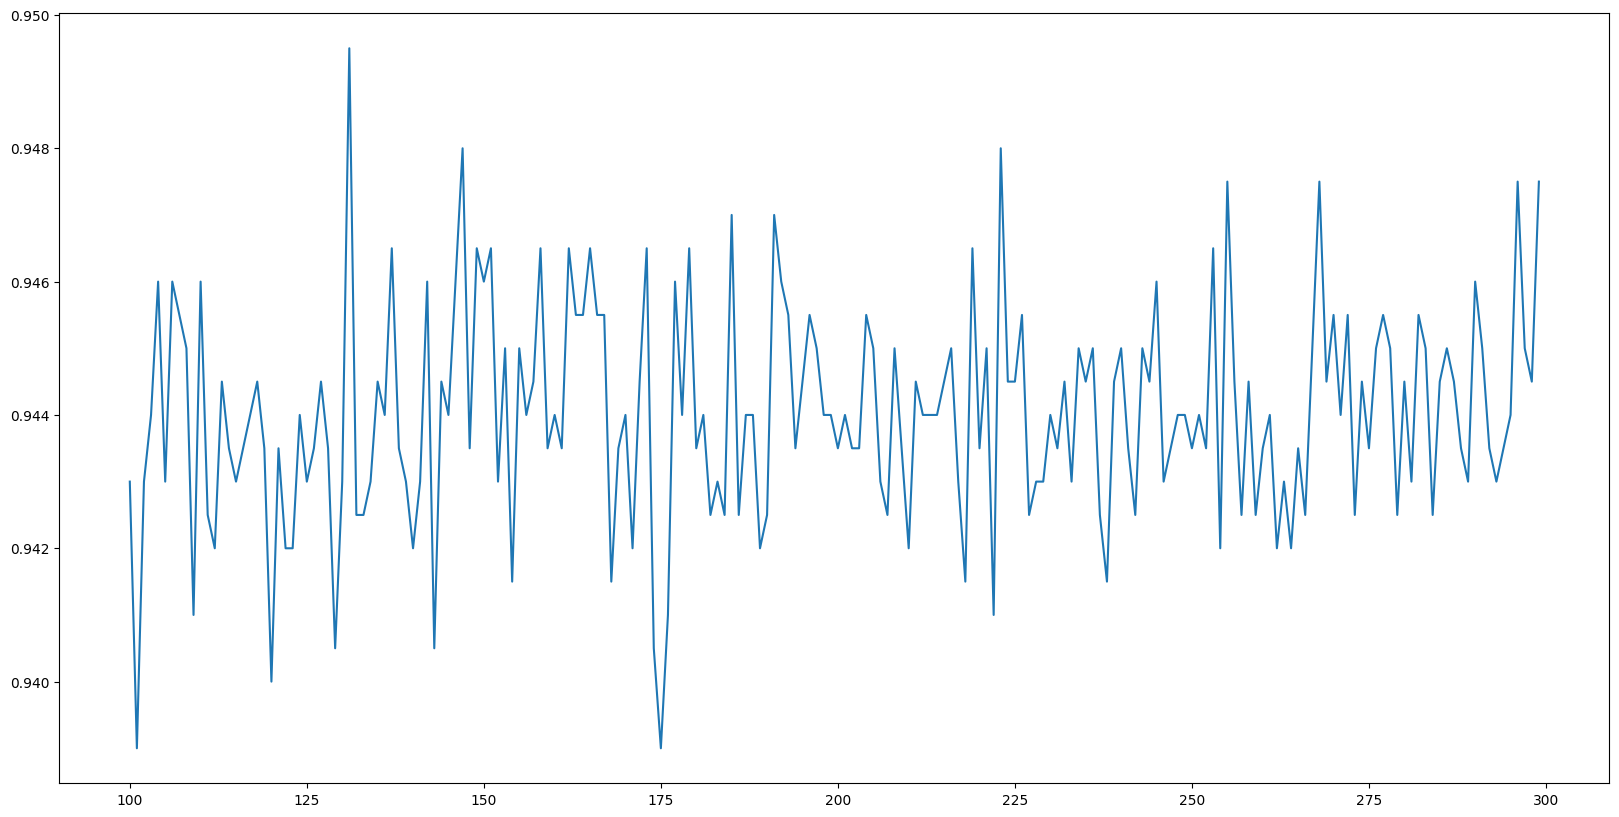

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(range(100,150),n_akurasi)
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# params = {'n_estimators':np.arange(100,500)}

# model=RandomForestClassifier()

# hyper_model=GridSearchCV(model,param_grid=params)

# hyper_model.fit(x_train,y_train)

In [ ]:
# hyper_model.best_params_

In [ ]:
# hyper_model.score(x_test,y_test)

### Klasifikasi data baru

In [112]:
new_data = [[2.96,86.76,172,85,2]]
new_data = scaler.transform(new_data)
new_pred = model.predict(new_data)
print(new_pred)

['orange']


In [113]:
import pickle

pickle.dump(model,open('fruit_rf.sav','wb'))
pickle.dump(scaler,open('fruit_rfScaler.sav','wb'))